# Titanic Dataset Investigation

By: Nick Shaw

Date: 2016-07-01

Project: P2 from the [Udacity Data Analyst Nano Degree](https://www.udacity.com/course/data-analyst-nanodegree--nd002)

## 1. Introduction

Data describing passengers on the Titanic will be used to investigate the following questions:

1. How does sex effect passenger class?
2. Does the age of a passenger have any effect on their survival? What effect does sex have?

The data used is from the Kaggle Titanic Dataset and can be found [here](https://www.kaggle.com/c/titanic/data).

Python with the help of pandas, numpy and matlibplot will be used for the investigation.

This project has a github page [here](https://github.com/shawger/uc-dand/tree/master/P2).

### 1.1 Code

In [147]:
# Start of code. This block is for imports, global variables, common functions and any setup needed for the investigation

%matplotlib inline

import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set some common formatting
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'figure.titlesize': 24})
matplotlib.rcParams.update({'axes.labelsize': 20})

matplotlib.rcParams.update({'figure.figsize': (18,12)})


#For some reason setting 'font.size' does not effect the ytick and xtick font sizes.
matplotlib.rcParams.update({'ytick.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 20})

#Set some color maps to keep common color schemes
sexColors = ['limegreen','dodgerblue']
classColors = ['gold','silver','rosybrown']
survivedColors = ['lightcoral','plum']

# The following function is used to create counts and percentages in the pie
def make_autopct(values):
  def my_autopct(pct):
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
  return my_autopct




## 2. Question 1: How does sex effect passenger class?

### 2.1 Data Wrangling

Data loaded from trian.csv.

In [148]:
# Open the csv and load into pandas dataframe

df = pd.read_csv('train.csv')

Now that the dataset is loaded, check if any rows contain bad data for the variables we are looking at.

- Passenger sex
- Passenger class
- If the passenger has siblings or spouses (this comes later)

In [149]:
#Use the pandas.isnull function to find any missing data
nullSex = df[pd.isnull(df['Sex'])]['PassengerId'].count()
nullClass = df[pd.isnull(df['Pclass'])]['PassengerId'].count()
nullSibSp = df[pd.isnull(df['SibSp'])]['PassengerId'].count()

print "Rows with no sex: %d\nRows with no pClass: %d\nRows with no SibSp: %d" % (nullSex,nullClass,nullSibSp)

Rows with no sex: 0
Rows with no pClass: 0
Rows with no SibSp: 0


No missing data found, so we don't need to worry about cleaning the data for this investigation.

### 2.2 1D Investigation

For the question, 'How does sex effect passenger class?', independently explore the variables sex and passenger class.

#### 2.2.1 Passenger Sex

As sex is a boolean thing (at least in this example) the only useful question we can answer is male vs female:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001429D0F0>], dtype=object)

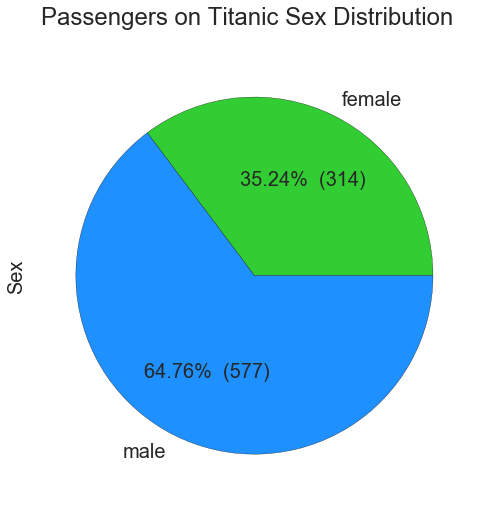

In [150]:
sexNumbers = df.groupby('Sex')['Sex'].count()

sexNumbers.plot.pie(subplots=True,
                    figsize=(8, 8),
                    autopct = make_autopct(sexNumbers),
                    title='Passengers on Titanic Sex Distribution',
                    colors = sexColors)

About 2/3 of the passengers are male and the other 1/3 female.

It might be interesting to compare this with passenger data from other ships in that era, or ships/trains/planes today.

#### 2.2.2 Passenger Class

There are 3 classes (1, 2, and 3) so lets see how many passengers in each group and what is that as a percent.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D4E87B8>], dtype=object)

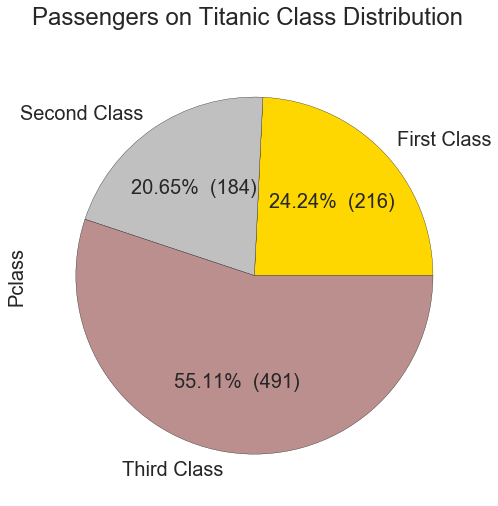

In [151]:
classNumbers = df.groupby('Pclass')['Pclass'].count()

classNumbers.plot.pie(subplots=True,
                      figsize=(8, 8),
                      autopct= make_autopct(classNumbers),
                      title='Passengers on Titanic Class Distribution',
                      labels = ['First Class', 'Second Class', 'Third Class'],
                      colors=classColors)

3rd Class makes up the majority of the passengers. There are a similar number of 1st and 2nd class passengers.

It might be interesting to compare this with passenger data from other ships in that era, or ships/trains/planes today.

### 2.3 2D Investigation

Investigate the relationship between passenger class and sex.

#### 2.3.1 Class Vs Sex on the Titanic
For this we can break the dataset into 2 groups (male and female) then look at how the makeup of the class is.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AA8D898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021A2C860>], dtype=object)

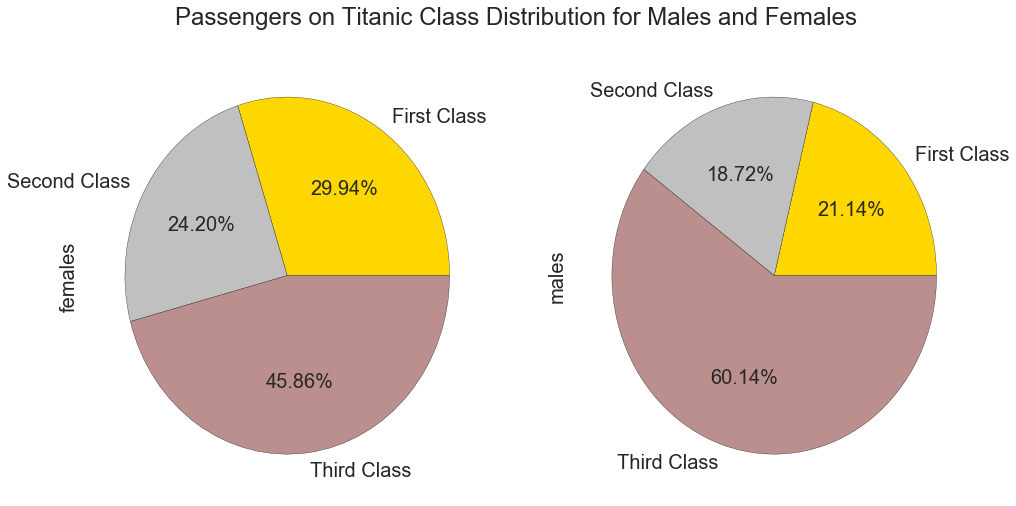

In [152]:
# Group passenegers into male and female, and then group by class and count the number of passengers in the groups
femaleVsClass = df[df['Sex'] == 'female'].groupby(['Pclass'])['Pclass'].count()
maleVsClass = df[df['Sex'] == 'male'].groupby(['Pclass'])['Pclass'].count()

# Combine the male and female results (for better graphing)
sexVsClass = pd.concat([femaleVsClass, maleVsClass], axis=1, keys=['females','males'])

#Plot the results
sexVsClass.plot.pie(subplots=True,
                    figsize=(16, 8),
                    autopct='%.2f%%',
                    title='Passengers on Titanic Class Distribution for Males and Females',
                    labels = ['First Class', 'Second Class', 'Third Class'],
                    legend=None,
                    colors=classColors)


The biggest difference is that a higher pct of males are in 3rd class then the % of females in third class.

One thought I have is that maybe there are more poor single men on the trip trying to get to America to start a new life. Let's see.

#### 2.3.2  Passengers Class and Sex vs Spouses

For this analysis take a look at how many males and females in each class have siblings or spouses onboard. Include the breakdown of all males and females with sibling or spouses in all class for reference.

             All                 First                Second            \
       females %    males %  females %    males %  females %   males %   
SibSp                                                                    
0      55.414013  75.216638  52.127660  72.131148  57.894737  70.37037   
1      33.757962  17.850953  42.553191  25.409836  36.842105  25.00000   
2       4.140127   2.599653   3.191489   1.639344   3.947368   4.62963   
3       3.503185   0.866551   2.127660   0.819672   1.315789       NaN   
4       1.910828   2.079723        NaN        NaN        NaN       NaN   
5       0.318471   0.693241        NaN        NaN        NaN       NaN   
8       0.955414   0.693241        NaN        NaN        NaN       NaN   

           Third             
       females %    males %  
SibSp                        
0      56.250000  77.809798  
1      26.388889  12.968300  
2       4.861111   2.305476  
3       5.555556   1.152738  
4       4.166667   3.458213  
5       0.694444   

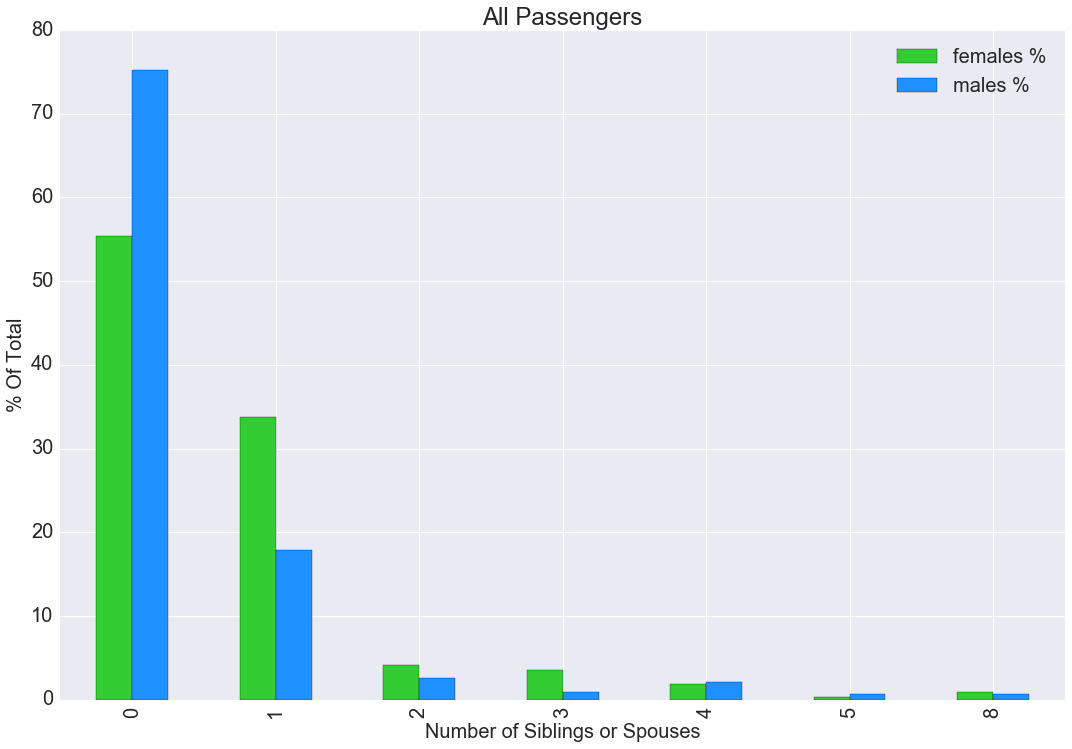

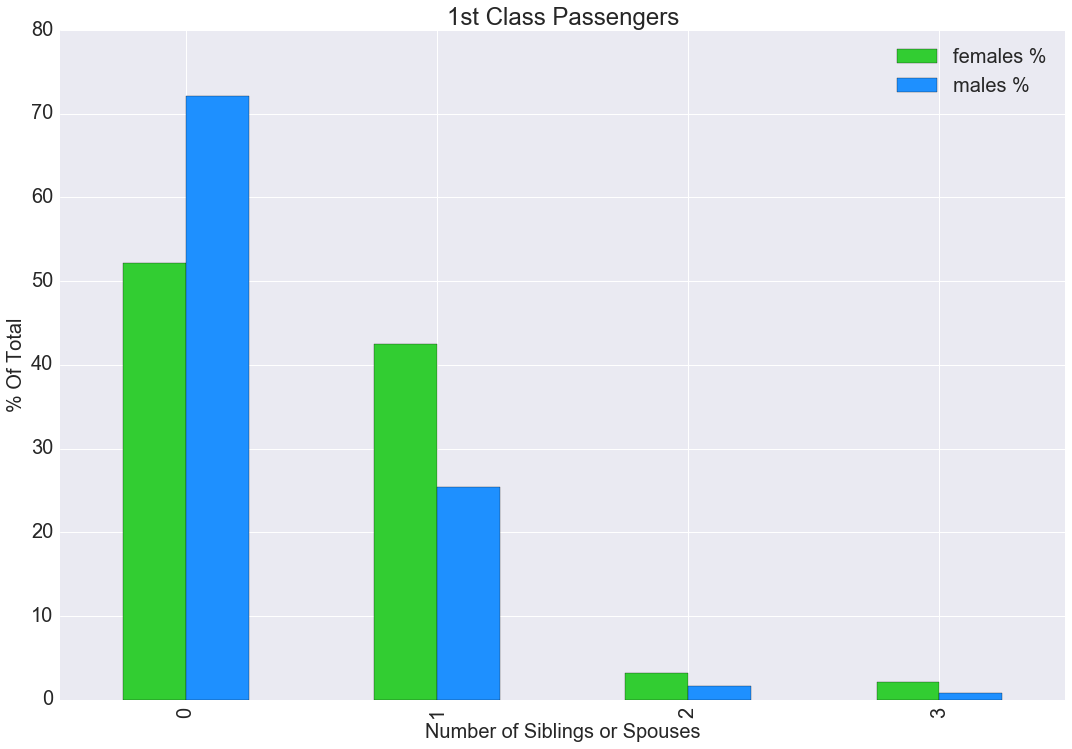

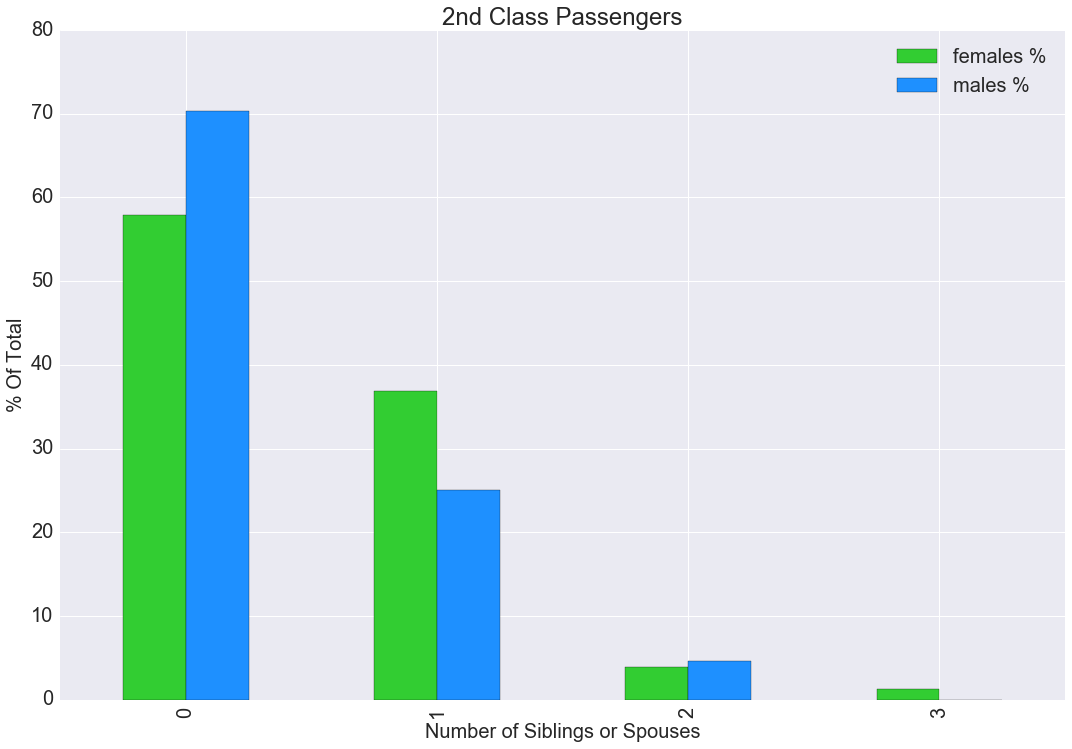

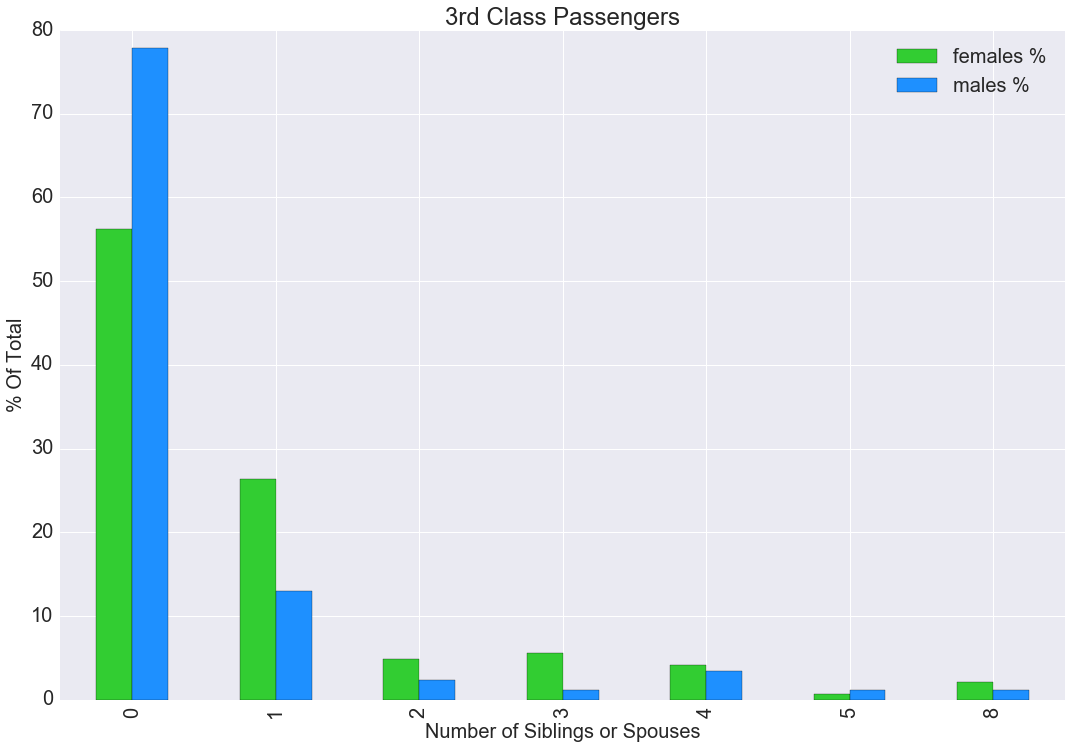

In [153]:
# Find the amount of males and females in all classes and group by the sibsp (sibblings or spouses on board)
# Since there are a different number of males and females in all classes, compare the results using % of total
male1AllClassTotal = df[(df['Sex'] == 'male')]['Pclass'].count()
maleAllClass = df[(df['Sex'] == 'male')].groupby(['SibSp'])['SibSp'].count()/male1AllClassTotal * 100

femaleAllClassTotal = df[(df['Sex'] == 'female')]['Pclass'].count()
femaleAllClass = df[(df['Sex'] == 'female')].groupby(['SibSp'])['SibSp'].count()/femaleAllClassTotal * 100

# Combine the males and females in all class to display on same graph
sexVsAllClass = pd.concat([femaleAllClass, maleAllClass], axis=1, keys=['females %','males %'])


# Find the amount of males and females in first class and group by the sibsp (sibblings or spouses on board)
# Since there are a different number of males and females in first class, compare the results using % of total
male1stClassTotal = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Pclass'].count()
male1stClass = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)].groupby(['SibSp'])['SibSp'].count()/male1stClassTotal * 100

female1stClassTotal = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Pclass'].count()
female1stClass = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)].groupby(['SibSp'])['SibSp'].count()/female1stClassTotal * 100

# Combine the males and females in first class to display on same graph
sexVs1stClass = pd.concat([female1stClass, male1stClass], axis=1, keys=['females %','males %'])

# Find the amount of males and females in second class and group by the sibsp (sibblings or spouses on board)
# Since there are a different number of males and females in second class, compare the results using % of total
male2ndClassTotal = df[(df['Sex'] == 'male') & (df['Pclass'] == 2)]['Pclass'].count()
male2ndClass = df[(df['Sex'] == 'male') & (df['Pclass'] == 2)].groupby(['SibSp'])['SibSp'].count()/male2ndClassTotal * 100

female2ndClassTotal = df[(df['Sex'] == 'female') & (df['Pclass'] == 2)]['Pclass'].count()
female2ndClass = df[(df['Sex'] == 'female') & (df['Pclass'] == 2)].groupby(['SibSp'])['SibSp'].count()/female2ndClassTotal * 100

# Combine the males and females in second class to display on same graph
sexVs2ndClass = pd.concat([female2ndClass, male2ndClass], axis=1, keys=['females %','males %'])

# Find the amount of males and females in third class and group by the sibsp (sibblings or spouses on board)
# Since there are a different number of males and females in third class, compare the results using % of total
male3rdClassTotal = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Pclass'].count()
male3rdClass = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)].groupby(['SibSp'])['SibSp'].count()/male3rdClassTotal * 100

female3rdClassTotal = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Pclass'].count()
female3rdClass = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)].groupby(['SibSp'])['SibSp'].count()/female3rdClassTotal * 100

# Combine the males and females in third class to display on same graph
sexVs3rdClass = pd.concat([female3rdClass, male3rdClass], axis=1, keys=['females %','males %'])

# Display the results
print pd.concat([sexVsAllClass, sexVs1stClass,sexVs2ndClass,sexVs3rdClass], axis=1, keys=['All','First','Second','Third'])
a1 = sexVsAllClass.plot.bar(color=sexColors)
a1.set_title('All Passengers',fontsize=24)
a1.set_xlabel('Number of Siblings or Spouses',fontsize=20)
a1.set_ylabel('% Of Total',fontsize=20)

a2 = sexVs1stClass.plot.bar(color=sexColors)
a2.set_title('1st Class Passengers',fontsize=24)
a2.set_xlabel('Number of Siblings or Spouses',fontsize=20)
a2.set_ylabel('% Of Total',fontsize=20)

a3 = sexVs2ndClass.plot.bar(color=sexColors)
a3.set_title('2nd Class Passengers',fontsize=24)
a3.set_xlabel('Number of Siblings or Spouses',fontsize=20)
a3.set_ylabel('% Of Total',fontsize=20)

a4 = sexVs3rdClass.plot.bar(color=sexColors)
a4.set_title('3rd Class Passengers',fontsize=24)
a4.set_xlabel('Number of Siblings or Spouses',fontsize=20)
a4.set_ylabel('% Of Total',fontsize=20)

Class does not seem to make much of a difference when it comes to the amount of men and women with siblings or spouses aboard.  The % of men aboard with no spouses of siblings aboard is higher then the % of women. It would suggest that men were more likely to travel alone then women regardless of class. 

One interesting thing (could be an out-lier) is that there are a few larger families in third class.

### 2.4 Discussion and Conclusions

- There were more men on the Titanic then women.
- The majority of passengers would be considered to be of the 3rd class.
- There is a higher % of men in 3rd class then women. The other classes are closer.
- The amount of siblings or spouses a passenger has does not seem to effect class or sex.

This investigation does not take into account the fact that the number of men with spouses or siblings could be effected by the number of women with siblings and spouses and vs versa.

Anything discussed in this section is based on the data in train.csv from the Kaggle website which only includes 891/2224 of the passengers. I can't find out which of the 891 passengers were selected so it is hard to know if there is any bias in the data (eg, was the crew included?). Therefor any conclusions only apply to the passengers included in the set.

## 3. Question 2: Does the age of a passenger have any effect on their survival? What effect does sex have?

For the question, 'Does the age of a passenger have any effect on their survival? What effect does sex have?', the variables will be investigated independently, then see what effect they have on each other.

### 3.1 Data Wrangling

Data loaded from trian.csv.

The data has already been loaded in section 2.1.

In [154]:
#Use the pandas.isnull function to find any missing data
nullSex = df[pd.isnull(df['Sex'])]['PassengerId'].count()
nullAge = df[pd.isnull(df['Age'])]['PassengerId'].count()
nullSurvived = df[pd.isnull(df['Survived'])]['PassengerId'].count()
totalRows = df['PassengerId'].count()

print "Rows with no Sex: %d\nRows with no Age: %d\nRows with no Survived: %d\nTotal: %d" % (nullSex,nullAge,nullSurvived,totalRows)

Rows with no Sex: 0
Rows with no Age: 177
Rows with no Survived: 0
Total: 891


It appears some rows with passenger age is missing. For this investigation, rows with missing age information will be discarded.

In [155]:
# Remove rows with a null age (blank age) from the dataframe
df = df[pd.notnull(df['Age'])]

nullAge = df[pd.isnull(df['Age'])]['PassengerId'].count()
totalRows = df['PassengerId'].count()

print "Rows with no Age: %d\nTotal: %d" % (nullAge,totalRows)

Rows with no Age: 0
Total: 714


For readability, add a column in the dataframe call 'Lived or Died' which has a string representation of whether a passenger survived.

In [156]:
# Add a column called 'Live or Died' with a string representation of the Survivedd column (which is 0 or 1)
d = {0: 'Died', 1: 'Lived'}
df['Lived or Died'] = df['Survived'].map(d)

### 3.2 1D Investigation

Passenger survival and passenger age will be investigated. To make it more interesting both will be investigated with the entire passenger population and then split into sexes. (Maybe not 1D, but splitting into sexes doesn't add a lot of complexity)

#### 3.2.1 Passenger Survival

               All  Men  Women
Lived or Died                 
Died           424  360     64
Lived          290   93    197


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021FB2710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001FC77DA0>], dtype=object)

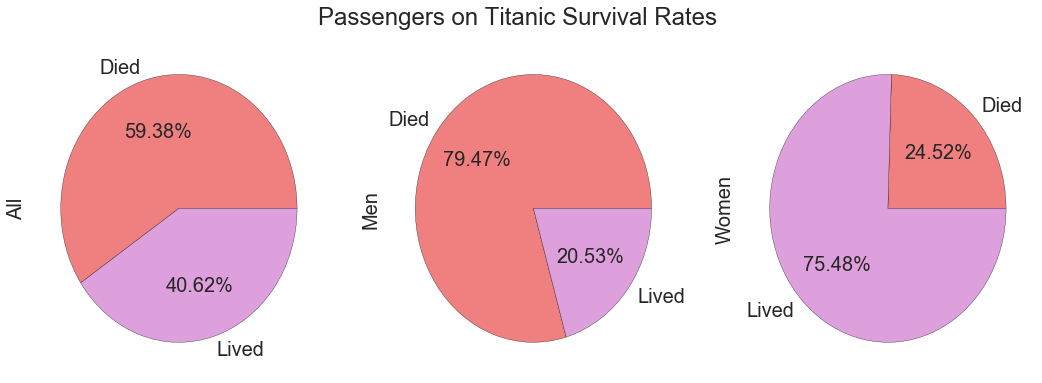

In [157]:
# Use group by to find numbers of passengers how survived. Break down into all, men and women

survivedAllNumbers = df.groupby('Lived or Died')['Lived or Died'].count()
survivedMenNumbers = df[df['Sex']=='male'].groupby('Lived or Died')['Lived or Died'].count()
survivedWomenNumbers = df[df['Sex']=='female'].groupby('Lived or Died')['Lived or Died'].count()

# Combine survival numbers for display
survivedNumbers = pd.concat([survivedAllNumbers, survivedMenNumbers,survivedWomenNumbers], axis=1, keys=['All','Men','Women'])

# Display the not 
print(survivedNumbers)
survivedNumbers.plot.pie(subplots=True,
                         figsize=(18, 6),
                         autopct='%.2f%%',
                         title='Passengers on Titanic Survival Rates',
                         legend=None,
                         colors=survivedColors)

More died then were saved. If you were a man it was much more unfortunate as most perished, with women having a much better (but still not perfect) survival rate.

#### 3.2.2 Passenger Age

              All        Male      Female
count  714.000000  453.000000  261.000000
mean    29.699118   30.726645   27.915709
std     14.526497   14.678201   14.110146
min      0.420000    0.420000    0.750000
25%     20.125000   21.000000   18.000000
50%     28.000000   29.000000   27.000000
75%     38.000000   39.000000   37.000000
max     80.000000   80.000000   63.000000


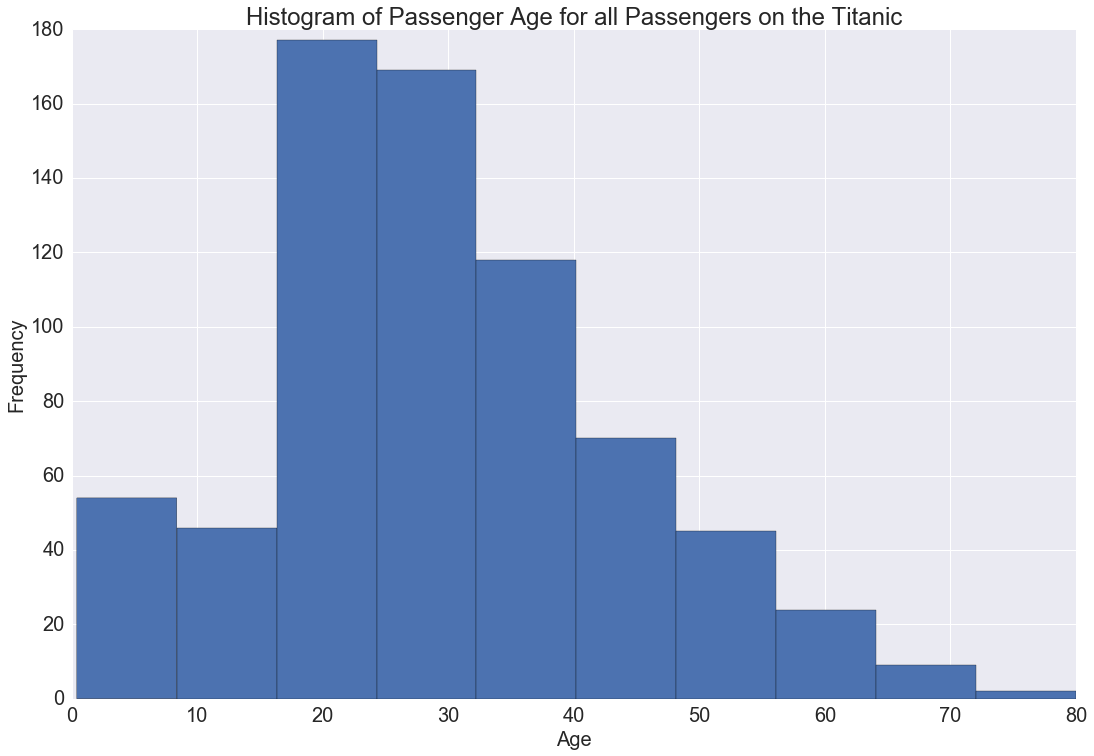

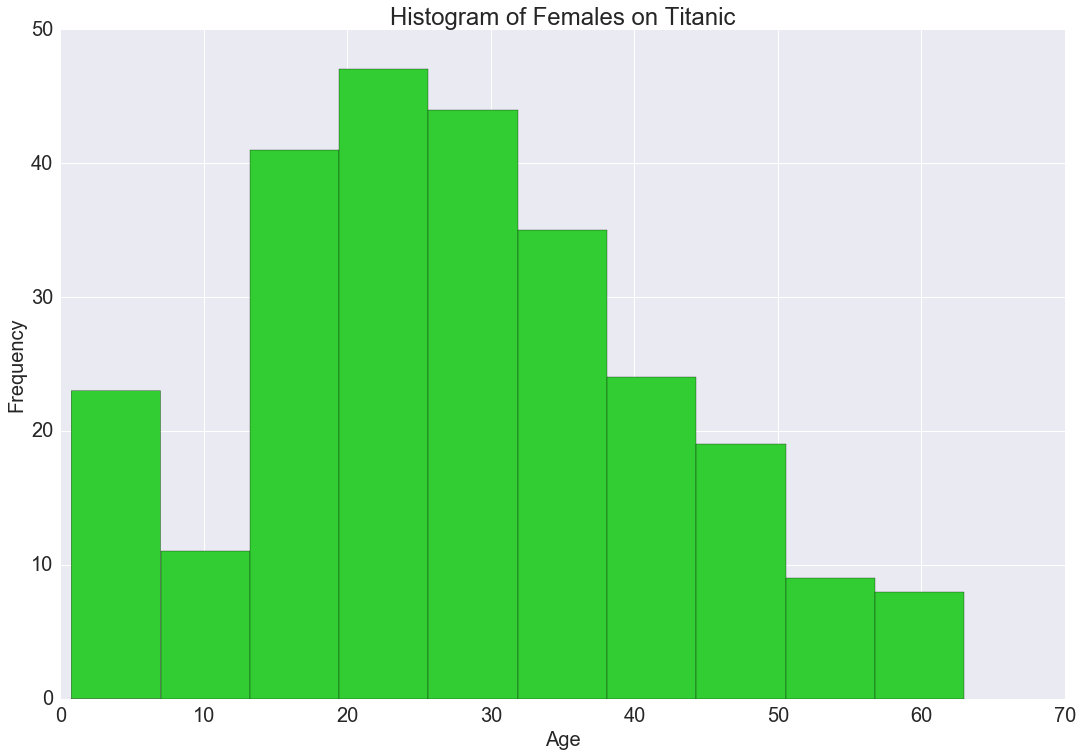

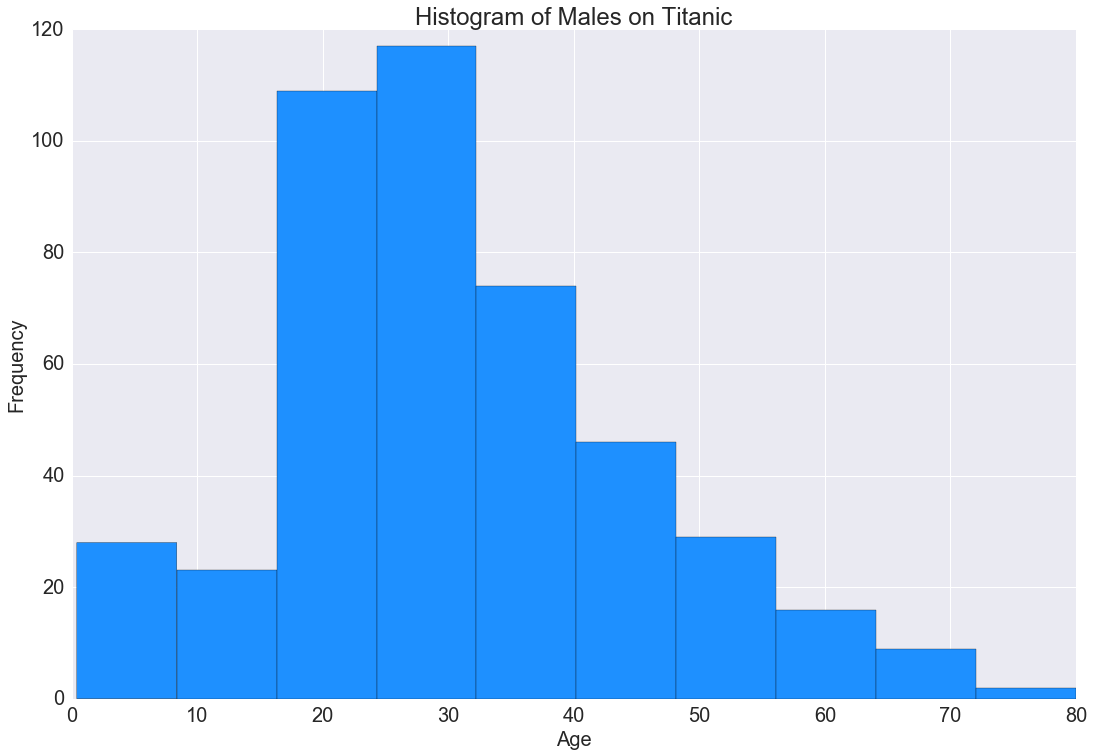

In [158]:
# Describe the datasets in one chart using a concat of the describes of all, males and females.
print pd.concat([df['Age'].describe(), 
                 df[df['Sex'] == 'male']['Age'].describe(),
                 df[df['Sex'] == 'female']['Age'].describe()],axis=1,
                 keys=['All','Male',"Female"])

# Show histograms of the total population, then for males and females sepperatly
df['Age'].hist()
plt.title('Histogram of Passenger Age for all Passengers on the Titanic',fontsize=24)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

df[df['Sex']=='female']['Age'].hist(color=sexColors[0])
plt.title('Histogram of Females on Titanic',fontsize=24)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

df[df['Sex']=='male']['Age'].hist(color=sexColors[1])
plt.title('Histogram of Males on Titanic',fontsize=24)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()


There are more males then females. The distribution looks pretty close with the average age of males is slightly higher, and there are a higher % of very young females then males.

### 3.3 2D Investigation

#### 3.3.1 Passenger Age vs Survival
Once again we will took at the whole population and then separate into males and females.

Use logistic regression to estimate the survival chances of a person at a certain age.

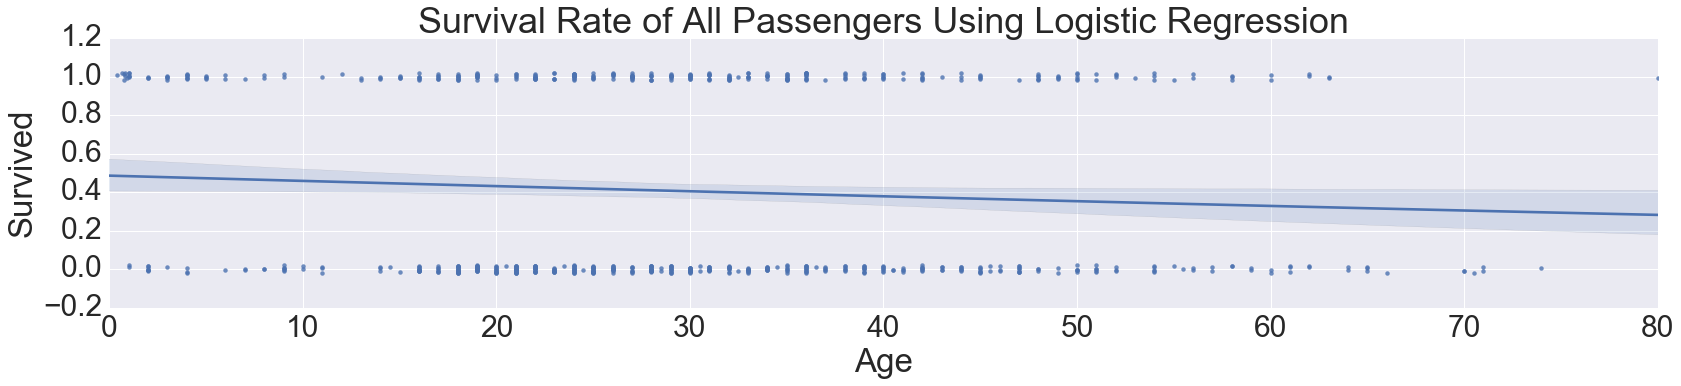

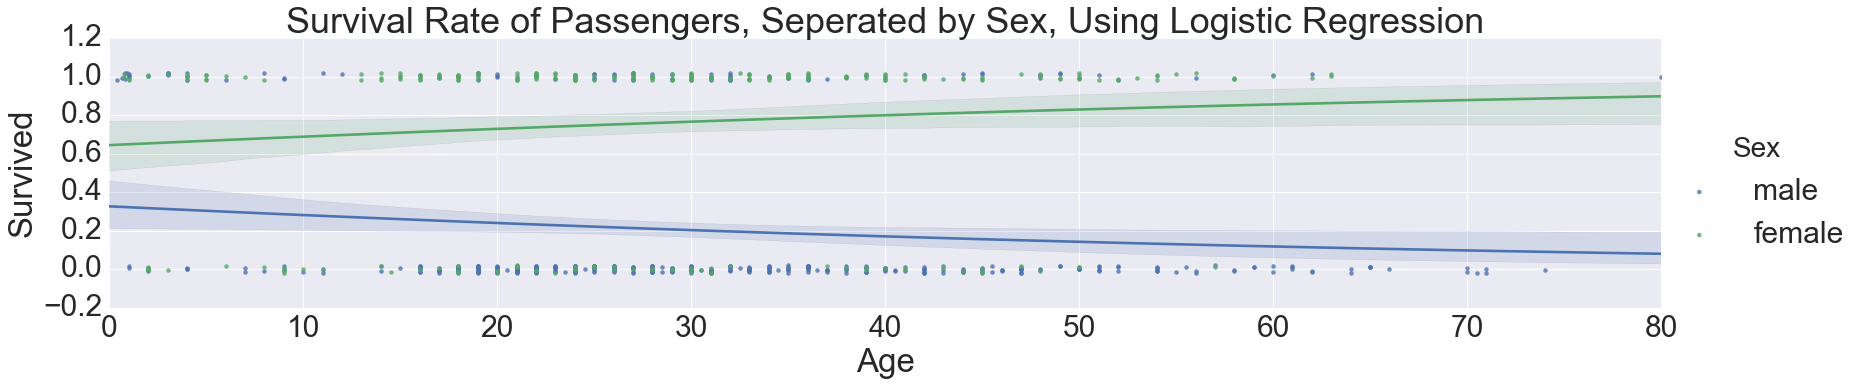

In [165]:
#Use seaborn to create graphs that use logistic regression to predict the survival % at different ages
#Show both population as a whole and split up males and females.
sns.set_context("notebook", font_scale=3)
sns.set_style("darkgrid")
                
g = sns.lmplot(x='Age', 
               y='Survived', 
               data=df, 
               y_jitter=.02, 
               logistic=True,
               size=6, 
               aspect=4)

g.set(xlim=(0,80),title='Survival Rate of All Passengers Using Logistic Regression')


g = sns.lmplot(x='Age',
               y='Survived', 
               hue="Sex", 
               data=df, 
               y_jitter=.02, 
               logistic=True,
               size=6, 
               aspect=4,)

g.set(xlim=(0,80),title='Survival Rate of Passengers, Seperated by Sex, Using Logistic Regression')

In general, being younger increases the chances of survival on the Titanic, but it changes a bit if you break it down by sexes.

- For men, the younger, the better their chance of survival.
- For women, older women actually had a better chance of survival.

### 3.4 Conclusion and Discussion

- Females had a much better chance of survival then males on the Titanic.
- Younger males had a better chance of survival then older males.
- Older females had a better chance of survival then younger females.

Anything discussed in this section is based on the data in train.csv from the Kaggle website which only includes 891/2224 of the passengers. I can't find out which of the 891 passengers were selected so it is hard to know if there is any bias in the data (eg, was the crew included?). Therefor any conclusions only apply to the passengers included in the set.

## 4. References

- http://pandas.pydata.org/pandas-docs/stable/visualization.html - For information on how to draw graphs.
- Whoever reviewed my first attempt and provided the code for make_autopct().